In [34]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [35]:
# load data
data = pd.read_csv('dataset/dataset.csv' , header=None) 
data = data.fillna(0)


In [36]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,wu,wr,wd,wl,au,ar,ad,al,bu,br,bd,bl,direction
1,256,240,256,272,0,0,0,0,0,0,0,0,2
2,272,240,240,272,0,1,0,0,0,0,0,0,1
3,272,224,240,288,0,1,0,0,0,0,0,0,1
4,272,208,240,304,0,1,0,0,0,0,0,0,1


In [37]:
data = data.iloc[1:]
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
1,256,240,256,272,0,0,0,0,0,0,0,0,2
2,272,240,240,272,0,1,0,0,0,0,0,0,1
3,272,224,240,288,0,1,0,0,0,0,0,0,1
4,272,208,240,304,0,1,0,0,0,0,0,0,1
5,272,192,240,320,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11432,432,144,80,368,0,0,0,1,0,1,0,0,3
11433,432,160,80,352,0,0,0,1,0,1,0,0,3
11434,432,176,80,336,0,0,0,1,0,1,0,0,3
11435,432,192,80,320,0,0,0,1,0,1,0,0,3


In [38]:
X = data.iloc[:,:-1].astype(int).values # همه ردیف ها تا ستون اخر
Y = data.iloc[: ,-1].astype(int).values # همه ردیف ها فقط ستون اخرشون


In [39]:
X , Y

(array([[256, 240, 256, ...,   0,   0,   0],
        [272, 240, 240, ...,   0,   0,   0],
        [272, 224, 240, ...,   0,   0,   0],
        ...,
        [432, 176,  80, ...,   1,   0,   0],
        [432, 192,  80, ...,   1,   0,   0],
        [432, 208,  80, ...,   1,   0,   0]]),
 array([2, 1, 1, ..., 3, 3, 3]))

In [40]:
X_train , X_test ,Y_train ,Y_test = train_test_split(X,Y, test_size=0.2, shuffle=True)

Y_train = Y_train.reshape(-1,1)
Y_test  = Y_test.reshape(-1,1)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12 , activation='sigmoid') , 
    tf.keras.layers.Dense(30,activation='relu') , 
    tf.keras.layers.Dense(16,activation='relu') , 
    tf.keras.layers.Dense(4 , activation='softmax')
])

In [41]:
X_train.shape , Y_train.shape , X_test.shape , Y_test.shape

((9148, 12), (9148, 1), (2288, 12), (2288, 1))

In [42]:
model.compile(optimizer='adam' ,
              loss='sparse_categorical_crossentropy' , 
              metrics=['accuracy']
)


In [43]:
output = model.fit(X_train,Y_train,epochs=108)

Epoch 1/108


286/286 [==============================] - 3s 3ms/step - loss: 1.3997 - accuracy: 0.2660
Epoch 2/108
286/286 [==============================] - 1s 4ms/step - loss: 1.3650 - accuracy: 0.3141
Epoch 3/108
286/286 [==============================] - 1s 4ms/step - loss: 1.3418 - accuracy: 0.3381
Epoch 4/108
286/286 [==============================] - 1s 4ms/step - loss: 1.3314 - accuracy: 0.3381
Epoch 5/108
286/286 [==============================] - 1s 5ms/step - loss: 1.3245 - accuracy: 0.3377
Epoch 6/108
286/286 [==============================] - 1s 5ms/step - loss: 1.3233 - accuracy: 0.3409
Epoch 7/108
286/286 [==============================] - 1s 4ms/step - loss: 1.3172 - accuracy: 0.3413
Epoch 8/108
286/286 [==============================] - 1s 4ms/step - loss: 1.3191 - accuracy: 0.3419
Epoch 9/108
286/286 [==============================] - 1s 4ms/step - loss: 1.3177 - accuracy: 0.3392
Epoch 10/108
286/286 [==============================] - 1s 5ms/step - loss: 1.3190 - accuracy: 0.3407
E

In [44]:
loss , accuracy = model.evaluate(X_test,Y_test)

72/72 [==============================] - 1s 3ms/step - loss: 0.0363 - accuracy: 0.9865


In [45]:
model.save('weights/snake_game_model.h5')


c:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


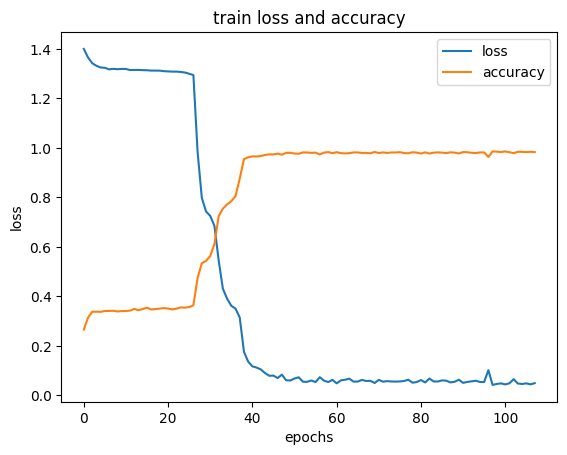

In [46]:

plt.plot(output.history["loss"], label='loss')
plt.plot(output.history["accuracy"], label='accuracy')
plt.title("train loss and accuracy")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()